In [1]:
pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3b/07/1252560194df2b4fad1cb3c46081b948331c63eb1bb0b97620d508d12a53/ucimlrepo-0.0.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [20]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_shuttle = fetch_ucirepo(id=148) 
  
# data (as pandas dataframes) 
X = statlog_shuttle.data.features 
y = statlog_shuttle.data.targets 
  
# metadata 
print(statlog_shuttle.metadata) 
  
# variable information 
print(statlog_shuttle.variables) 


{'uci_id': 148, 'name': 'Statlog (Shuttle)', 'repository_url': 'https://archive.ics.uci.edu/dataset/148/statlog+shuttle', 'data_url': 'https://archive.ics.uci.edu/static/public/148/data.csv', 'abstract': 'The shuttle dataset contains 9 attributes all of which are numerical. Approximately 80% of the data belongs to class 1', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 58000, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': None, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C5WS31', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Approximately 80% of the data belongs to class 1. Therefore the default accuracy is about 80%. The aim here is to obtain an accuracy of 99 - 99.9%.\r\n\r\nThe examples in the original dataset were in time or

{'ids': None,
 'features':        Rad Flow  Fpv Close  Fpv Open  High  Bypass  Bpv Close  Bpv Open
 50 21        77          0        28     0      27         48        22
 55 0         92          0         0    26      36         92        56
 53 0         82          0        52    -5      29         30         2
 37 0         76          0        28    18      40         48         8
    0         79          0        34   -26      43         46         2
 ...         ...        ...       ...   ...     ...        ...       ...
 80 0         84          0       -36   -29       4        120       116
 55 0         81          0       -20    25      26        102        76
    0         77          0        12   -22      22         65        42
 37 0        103          0        18   -16      66         85        20
 56 2         98          0        52     1      42         46         4
 
 [58000 rows x 7 columns],
 'targets':        class
 50 21      2
 55 0       4
 53 0       1
 3

In [18]:
import pandas as pd
# Combine features and target for ease of analysis
data = pd.concat([X, y], axis=1)

# Step 3: Understand the basic structure of the dataset
print("Dataset Shape:", data.shape)
print("First few rows of the dataset:\n", data.head())
print("Data types:\n", data.dtypes)
print("Summary statistics:\n", data.describe())

# Step 4: Perform basic statistical analysis
# Checking for missing values
print("Missing values:\n", data.isnull().sum())




Dataset Shape: (58000, 8)
First few rows of the dataset:
        Rad Flow  Fpv Close  Fpv Open  High  Bypass  Bpv Close  Bpv Open  class
50 21        77          0        28     0      27         48        22      2
55 0         92          0         0    26      36         92        56      4
53 0         82          0        52    -5      29         30         2      1
37 0         76          0        28    18      40         48         8      1
   0         79          0        34   -26      43         46         2      1
Data types:
 Rad Flow     int64
Fpv Close    int64
Fpv Open     int64
High         int64
Bypass       int64
Bpv Close    int64
Bpv Open     int64
class        int64
dtype: object
Summary statistics:
            Rad Flow     Fpv Close      Fpv Open          High        Bypass  \
count  58000.000000  58000.000000  58000.000000  58000.000000  58000.000000   
mean      85.349121      0.259672     34.549862      1.608190     37.092310   
std        8.902769     36.5215

In [19]:
data.sort_values(by='Rad Flow', inplace=True)
data.iloc[0]
data.head()


Rad Flow  Fpv Close  Fpv Open  High  Bypass  Bpv Close  Bpv Open  class
37  0        21      -3939         6     0     -16         16        32      1
55  0        29       -194       -22     0     -26         52        78      5
    0        29       -674       -22    -1     -26         52        78      5
37 -1        40         -6        36   -10       4          4         0      1
    0        44        -83        24     1       7         20        14      1

C:\Users\nandi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


NameError: name 'plt' is not defined

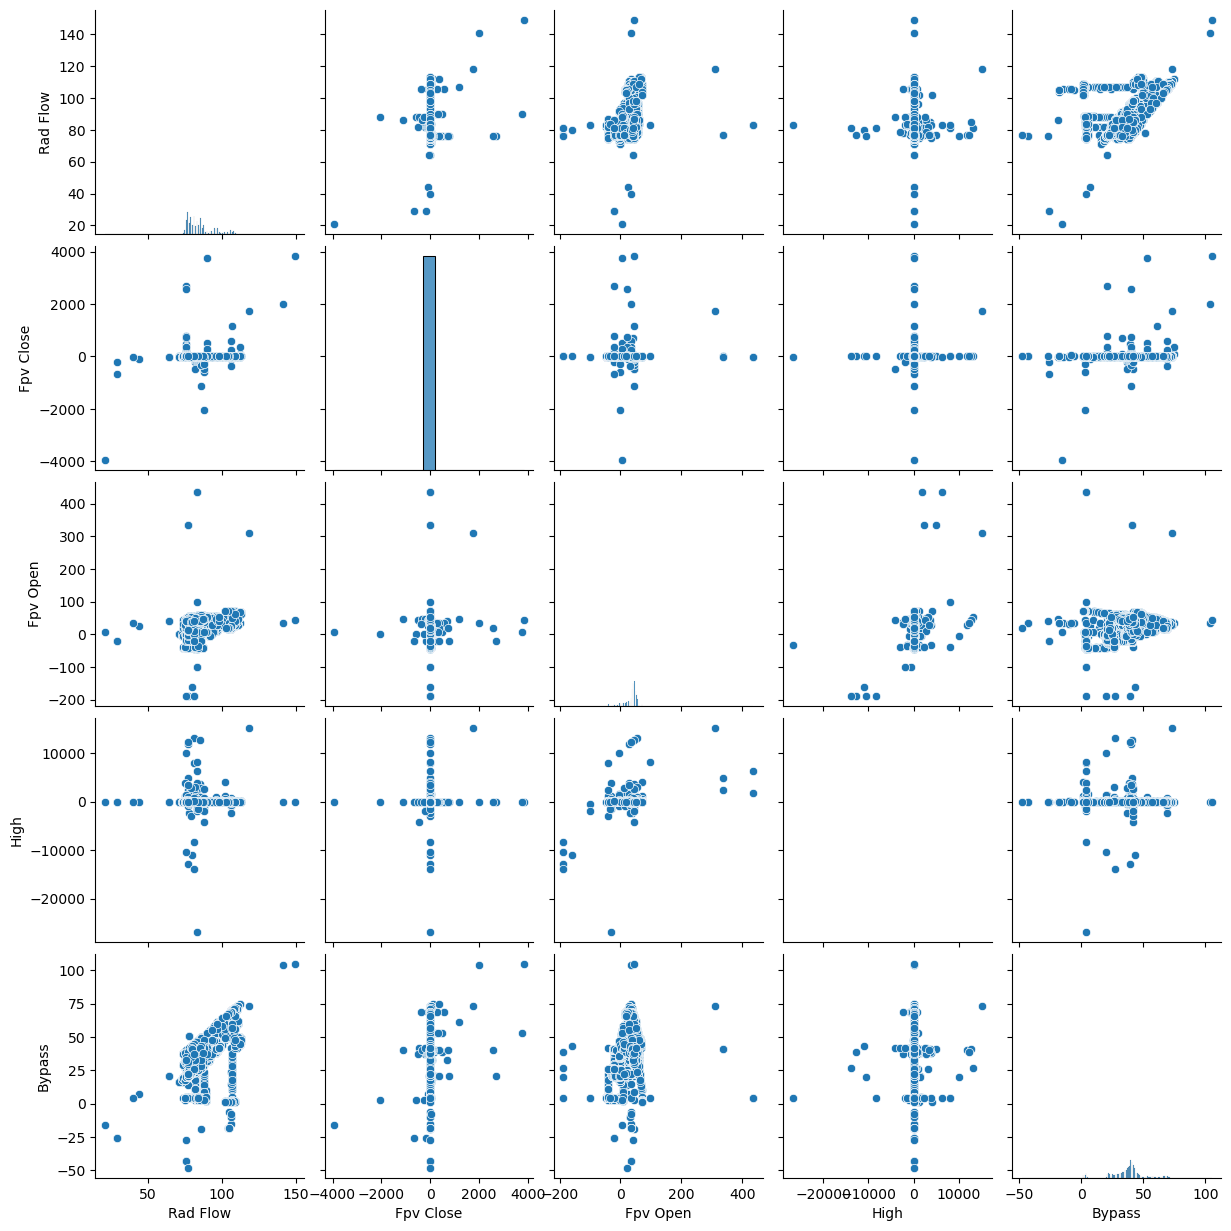

In [11]:
import seaborn as sns


# Step 5: Visualize the data
# Pairplot for a subset of features to understand relationships
sns.pairplot(data.iloc[:, :5])  # Adjust the slice for different subsets of features
plt.show()

# Distribution of each feature
data.iloc[:, :-1].hist(bins=30, figsize=(20, 15))
plt.suptitle("Feature Distributions")
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Boxplot to check for outliers in features
plt.figure(figsize=(20, 15))
sns.boxplot(data=data.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()
